Đã tìm thấy lời giải xuất phát từ (0, 0)


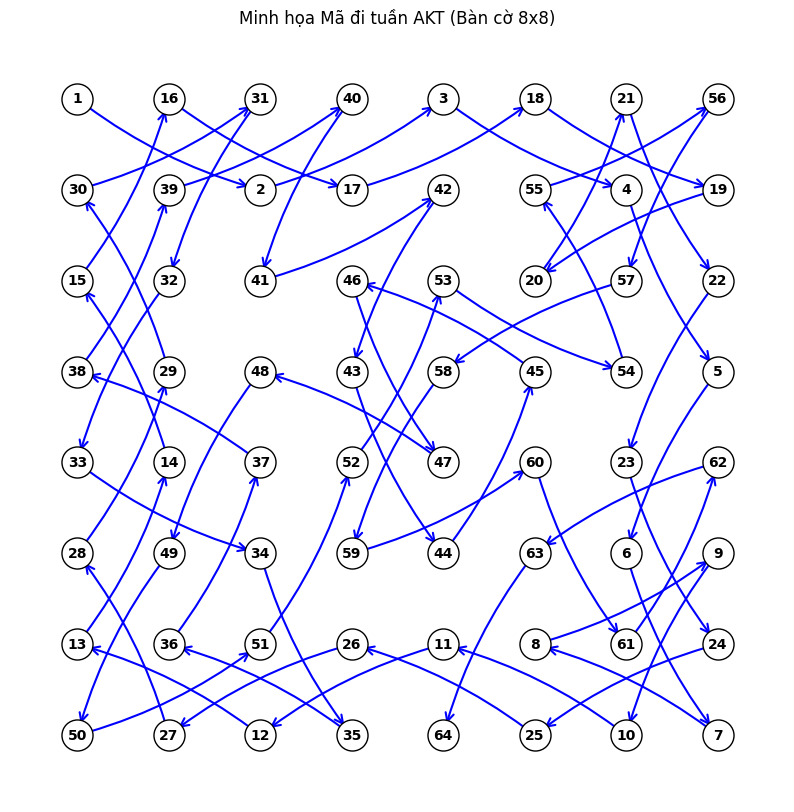

In [1]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt


# 1. Đọc cấu hình từ file
def load_config(filename):
    with open(filename, "r") as f:
        size = int(f.readline().strip())
        start = tuple(map(int, f.readline().split()))
    return size, start


# 2. Thuật toán tìm bước đi hợp lệ
def get_moves(x, y, board_size, visited):
    directions = [
        (2, 1),
        (2, -1),
        (-2, 1),
        (-2, -1),
        (1, 2),
        (1, -2),
        (-1, 2),
        (-1, -2),
    ]
    moves = []
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < board_size and 0 <= ny < board_size and not visited[nx][ny]:
            moves.append((nx, ny))
    return moves


# 3. AKT (Warnsdorff's Rule)
def solve_knight_tour(board_size, start_pos):
    visited = [[False for _ in range(board_size)] for _ in range(board_size)]
    path = []

    def backtrack(curr_x, curr_y, step_count):
        visited[curr_x][curr_y] = True
        path.append((curr_x, curr_y))

        if step_count == board_size * board_size:
            return True

        neighbors = get_moves(curr_x, curr_y, board_size, visited)
        # Sắp xếp theo "Tri thức": ô có ít lối thoát nhất đi trước
        ranked_neighbors = []
        for nx, ny in neighbors:
            degree = len(get_moves(nx, ny, board_size, visited))
            ranked_neighbors.append((degree, nx, ny))
        ranked_neighbors.sort()

        for _, nx, ny in ranked_neighbors:
            if backtrack(nx, ny, step_count + 1):
                return True

        visited[curr_x][curr_y] = False
        path.pop()
        return False

    if backtrack(start_pos[0], start_pos[1], 1):
        return path
    return None


# 4. Minh họa bằng NetworkX
def visualize_knight_tour(board_size, path):
    G = nx.DiGraph()  # Đồ thị có hướng để chỉ rõ trình tự bước đi

    # Tạo các nút và vị trí theo hình bàn cờ
    pos = {}
    for r in range(board_size):
        for c in range(board_size):
            G.add_node((r, c))
            pos[(r, c)] = (c, -r)  # Xoay để (0,0) nằm góc trên trái

    # Thêm các cạnh theo thứ tự quân mã đi
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    G.add_edges_from(edges)

    plt.figure(figsize=(10, 10))

    # Vẽ bàn cờ (ô vuông)
    nx.draw_networkx_nodes(
        G, pos, node_size=500, node_color="white", edgecolors="black"
    )

    # Vẽ đường đi của quân mã
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=edges,
        edge_color="blue",
        arrowstyle="->",
        arrowsize=15,
        width=1.5,
        connectionstyle="arc3,rad=0.1",
    )

    # Đánh số thứ tự bước đi lên các ô
    labels = {node: i + 1 for i, node in enumerate(path)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight="bold")

    plt.title(f"Minh họa Mã đi tuần AKT (Bàn cờ {board_size}x{board_size})")
    plt.axis("off")
    plt.show()


# --- CHẠY CHƯƠNG TRÌNH ---
try:
    size, start_pos = load_config("knight_config.txt")
    tour_path = solve_knight_tour(size, start_pos)

    if tour_path:
        print(f"Đã tìm thấy lời giải xuất phát từ {start_pos}")
        visualize_knight_tour(size, tour_path)
    else:
        print("Không có lời giải!")
except FileNotFoundError:
    print("Vui lòng tạo file 'knight_config.txt' trước.")